# TOULOUSE DATA SCIENCE  Code Week
## Atelier découverte de la Data Science
### _N. Salaün-Penquer (trésorière TDS)_
### _N. Decoster_


In [18]:
from math import *
from decimal import Decimal 
from __future__ import division 
import random
import csv

## Classification non supervisée

**_Définition_**: Les classifications non supervisées sont des classifications qui construisent leurs clusters en se basant uniquement sur la donnée. 

**_Objectifs_**: Observer, sans a priori la présence de groupes.

**_Méthodes les plus connues_**: 

* Kmeans
* Classification hierarchique ascendante
* Dbscan
* Pam


### A- Kmeans

In [2]:
data = [[1,2],
        [1,2],
        [5,0],
        [6,0]
        ]
data

4


[[1, 2], [1, 2], [5, 0], [6, 0]]

In [ ]:
# Executer Kmeans sur le dataset avec les clusters au choix


In [ ]:
# Executer la visu pour voir l'évolution des points + le CSV

In [ ]:
# En fonction des niveaux
    # Fonction de distance à implémenter
    # Algo à l'aide des fonctions
    # Implémentation des fonctions
# Limites de Kmeans et les erreurs
# Aller plus loin

In [4]:
# Définition d'une fonction de distance
# Distance Euclidienne
# La plus basique, c'est la longeur du trait qui permet de relier deux points entre eux
def distanceEuclidienne(A,B):
    return sqrt(pow(B[0]-A[0],2)+pow(B[1]-A[1],2))
# Distance de Manhattan
# appelée aussi taxi-distance3, est la distance entre deux points parcourue par un taxi 
#lorsqu'il se déplace dans une ville où les rues sont agencées selon un réseau ou quadrillage
def distanceManhattan(A,B):
    return abs(B[0]-A[0])+abs(B[1]-A[1])

# Exemples
print(distanceManhattan(center1,data[0]))
print(distanceEuclidienne(center1,data[0]))

3
2.2360679775


En vert la distance euclidienne
Les autres couleurs, la distance de Mahattan


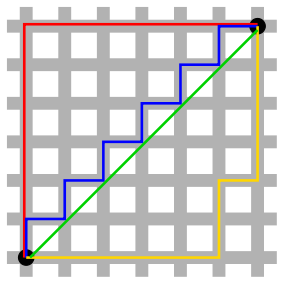

In [5]:
# Différence entre les distances
from IPython.display import Image
print('En vert la distance euclidienne')
print('Les autres couleurs, la distance de Mahattan')
Image(filename='C:\Users\lata\Desktop\image1.png')

In [6]:
# Définitions plus complètes 
def manhattan_distance(x,y):
    return sum(abs(a-b) for a,b in zip(x,y))
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
def minkowski_distance(x,y,p_value):
    return nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),p_value)

# Définition sous fonctions
def nth_root(value, n_root):
    root_value = 1/float(n_root)
    return round (Decimal(value) ** Decimal(root_value),3)

# Exemples
print(manhattan_distance(center1,data[0]))
print(euclidean_distance(center1,data[0]))
print (minkowski_distance(center1,data[0],2))

# http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/
# Distance par mesure de cosinus et distance de Jaccard

3
2.2360679775
2.236


In [63]:
# Fonctions nécessaires
# Calcul des barycentres
def barycentre(listeP):
    nbE=len(listeP)
    dim=len(listeP[0])
    centre=[0]*dim
    for i in range (nbE):
        for j in range(dim):
            centre[j]+=listeP[i][j]
            j+=1
        i+=1
    return [i/nbE for i in centre]

# Calcul des centroides aléatoires
def centroidesAleatoire(dim):
    res=[]
    for i in range(dim):
        res+=[random.randint(1,10)]
    return res

# Définition du Kmeans revoir le nb de cluster
def kmeans_versionSimpliste(data, nbClusters, fonctionDistance, iterMax):
    # centroïdes aléatoires
    dim=len(data[0])
    # fonction de construction des centroides 
    # centroides = initCentroidesAlea(dim, nbCluster)
    centre1 = centroidesAleatoire(dim)
    centre2 = centroidesAleatoire(dim)
    # Calcule de la distance de chaque point avec les centroïdes
    # Nb de points (éléments de la liste)
    nbPoints=len(data)
    nbIteration=0
    
    classe1=[]
    classe2=[]
    #nvCentre1 != centre1 and nvCentre2 != centre2 or
    fin=1
    while nbIteration < iterMax and fin:
        # liste de classes, fonction Initialiser les classes
        classe1=[]
        classe2=[]
        # Classer en fonction de la distance des centroides
        for i in range (nbPoints):
            distance1=fonctionDistance(centre1,data[i])
            distance2=fonctionDistance(centre2,data[i])
            if distance1<distance2:
                classe1+=[data[i]]
            else:
                classe2+=[data[i]]
            i+=1
        # Calcule du nouveau centroïde de chaque classe
        #Nb points dans la classe 1
        if len(classe1)>0 and len(classe2)>0:
            # repositionner les centres de classe
            nvCentre1=barycentre(classe1)
            nvCentre2=barycentre(classe2)
            if nvCentre1==centre1 and nvCentre2==centre2:
                fin=0
                print('les centroïdes sont immobiles')
            else:
                centre1=nvCentre1
                centre2=nvCentre2
        else:
            fin=0
            print('une des classes est vide')

        nbIteration+=1
    return classe1, classe2

In [62]:
kmeans_versionSimpliste(data,2,distanceManhattan)

les centroïdes sont immobiles


([[5, 0], [6, 0]], [[1, 2], [1, 2]])

In [92]:
# Exemple sur des notes d'élèves philosophie et mathématiques
with open('C:\Users\lata\Desktop\exemple.csv', 'rb') as f:
    dataSet = [[int(x) for x in rec] for rec in csv.reader(f, delimiter=';')]
print(dataSet)
# Nettoyage du Data:
    # traitement des var incohérentes
    # traitement des valeurs vides
    # traitement des erreurs (encodage)
# Stat de vérif
print(####### KMEANS ########)
kmeans_versionSimpliste(dataSet,2,distanceManhattan)

[8, 20]

In [94]:
# Visualisation
# Projection de points

In [95]:
# Limites de Kmeans: calcul de distance donc données numériques ou calcul à partir d'une matrice de similarité
# Gpes différents parfois
# Choix du nb de groupe à l'utilisateur
# Certaines configurations mal classées Mauvaise prise en compte des valeurs extrêmes

In [ ]:
# Exemple d'un mauvais classement
# Ouverture vers Scikit Learn

In [ ]:
# Ajouter la notion de similarité

### DBSCAN
L'algorithme DBSCAN utilise 2 paramètres : la distance {\displaystyle \epsilon } \epsilon  et le nombre minimum de points {\displaystyle MinPts} MinPts devant se trouver dans un rayon {\displaystyle \epsilon } \epsilon  pour que ces points soient considérés comme un cluster. Les paramètres d'entrées sont donc une estimation de la densité de points des clusters. L'idée de base de l'algorithme est ensuite, pour un point donné, de récupérer son {\displaystyle \epsilon } \epsilon -voisinage et de vérifier qu'il contient bien MinPts points ou plus. Ce point est alors considéré comme faisant partie d'un cluster. On parcourt ensuite l' {\displaystyle \epsilon } \epsilon -voisinage de proche en proche afin de trouver l'ensemble des points du cluster.

In [ ]:
# Premier exo : utiliser la fonction des Kmeans avec un data set fourni
# 